# Classification - k-nearest-neighbors - Education Attainment

In [1]:
# Import all utitlised libraries
from sklearn import neighbors, datasets
import pandas as pd
import sys
sys.path.append('../resources')
from w6support import plot_2d_class       
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib
matplotlib.style.use('ggplot') 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Next we import and further prepare our data by evaluating the columns.

In [2]:
originalDF = pd.read_csv('educationFeatureSubset.csv')

# Next we check the Education_Attainment options in the dataset for use with classification
print(originalDF.Education_Attainment.unique())

# Now we replace those values with integers for use with the classification algorithm
education_values = {"Education_Attainment": {"Masters": 1, "Some_College": 2, "College": 3, "High_School": 4, "Professional": 5, "Grammar": 6, "Special": 7, "Doctoral": 8, "Other": 9}}
originalDF.replace(education_values, inplace=True)

featureDF = originalDF[originalDF.columns.difference(['Education_Attainment', 'Unnamed: 0'])]
featureDF.head(5)

['Masters' 'Some_College' 'College' 'High_School' 'Professional' 'Grammar'
 'Special' 'Doctoral' 'Other']


Actual_Time  Age  Country  Household_Income  Marital_Status  \
0           14   31      114                 7               1   
1           13   18      114                 8               5   
2           34   15       31                 7               3   
3           40   18       41                 4               3   
4           24    7       88                 8               5   

   Primary_Computing_Platform  Primary_Place_of_WWW_Access  \
0                           3                            5   
1                          10                            2   
2                          10                            5   
3                          10                            2   
4                          10                            4   

   Who_Pays_for_Access_Parents  Who_Pays_for_Access_School  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   Willingness_to_Pay_Fees  
0                        4  
1                        0  
2                        4  
3                        0  
4                        0

In [3]:
X, y = featureDF, originalDF['Education_Attainment']

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

We will do an initial test of KNeighborsClassifier first to check that prediction is happening with the feature set. As you can see, the predict() function just picks the most likely label. I have encoded the occupation categories, so use a decoder method to view the Category result from the prediction params.

In [4]:
# call the "predict" method on our randomised prediction values :
result = knn.predict([[14,31,114,7,1,3,5,0,0,4]])

for key, val in education_values['Education_Attainment'].items():
    if val == result:
        print(key)

Masters


In [5]:
knn.predict_proba([[14,31,114,7,1,3,5,0,0,4]])

array([[0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. ]])

Remember: the label (1,2,3,4,5,6,7,8,9) maps to 'Masters' 'Some_College' 'College' 'High_School' 'Professional' 'Grammar'
 'Special' 'Doctoral' 'Other'. Therefore, the probability that it is 'Masters' 'Some_College' 'College' 'High_School' 'Professional' 'Grammar'
 'Special' 'Doctoral' 'Other' is 0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0.  respectively. In this resultset Masters is chosen.

In the next block of code, we take predictor pairs and use the k-nearest-neighbour algorithm with k=3,5,7. 

Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_ActualTime_Age.pdf
Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_ActualTime_Country.pdf
Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_ActualTime_HouseholdIncome.pdf
Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_ActualTime_MaritalStatus.pdf
Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_ActualTime_PrimaryComputingPlatform.pdf
Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_ActualTime_PrimaryPlaceOfWwwAccess.pdf
Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_ActualTime_WhoPaysForAccessParents.pdf
Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_ActualTime_WhoPaysForAccessSchool.pdf
Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_ActualTime_WillingnessToPayFees.pdf
Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_Age_Country.pdf
Plotting f

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_Country_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_Country_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_Country_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_HouseholdIncome_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_HouseholdIncome_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_HouseholdIncome_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_HouseholdIncome_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_HouseholdIncome_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_HouseholdIncome_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_MaritalStatus_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_MaritalStatus_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_MaritalStatus_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_MaritalStatus_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_MaritalStatus_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_PrimaryComputingPlatform_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_PrimaryComputingPlatform_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_PrimaryComputingPlatform_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_PrimaryComputingPlatform_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_WhoPaysForAccessParents_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_WhoPaysForAccessParents_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_3_nearest-neighbours_Occupation_WhoPaysForAccessSchool_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_ActualTime_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_ActualTime_Country.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_ActualTime_HouseholdIncome.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_ActualTime_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_ActualTime_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_ActualTime_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_ActualTime_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_ActualTime_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_ActualTime_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Age_Country.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Age_HouseholdIncome.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Age_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Age_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Age_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Age_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Age_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Age_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Country_HouseholdIncome.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Country_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Country_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Country_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Country_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Country_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_Country_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_HouseholdIncome_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_HouseholdIncome_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_HouseholdIncome_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_HouseholdIncome_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_HouseholdIncome_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_HouseholdIncome_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_MaritalStatus_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_MaritalStatus_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_MaritalStatus_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_MaritalStatus_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_MaritalStatus_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_PrimaryComputingPlatform_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_PrimaryComputingPlatform_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_PrimaryComputingPlatform_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_PrimaryComputingPlatform_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_WhoPaysForAccessParents_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_WhoPaysForAccessParents_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_5_nearest-neighbours_Occupation_WhoPaysForAccessSchool_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_ActualTime_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_ActualTime_Country.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_ActualTime_HouseholdIncome.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_ActualTime_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_ActualTime_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_ActualTime_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_ActualTime_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_ActualTime_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_ActualTime_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Age_Country.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Age_HouseholdIncome.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Age_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Age_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Age_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Age_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Age_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Age_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Country_HouseholdIncome.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Country_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Country_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Country_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Country_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Country_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_Country_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_HouseholdIncome_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_HouseholdIncome_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_HouseholdIncome_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_HouseholdIncome_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_HouseholdIncome_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_HouseholdIncome_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_MaritalStatus_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_MaritalStatus_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_MaritalStatus_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_MaritalStatus_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_MaritalStatus_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_PrimaryComputingPlatform_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_PrimaryComputingPlatform_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_PrimaryComputingPlatform_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_PrimaryComputingPlatform_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_WhoPaysForAccessParents_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_WhoPaysForAccessParents_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/education/k_7_nearest-neighbours_Occupation_WhoPaysForAccessSchool_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


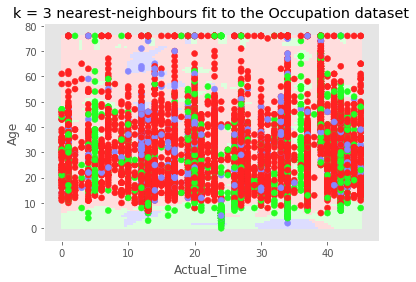

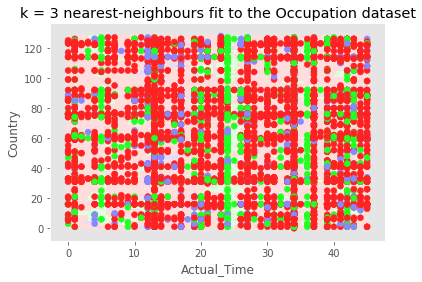

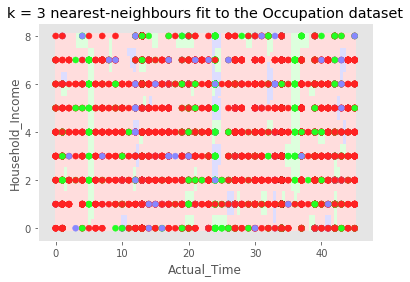

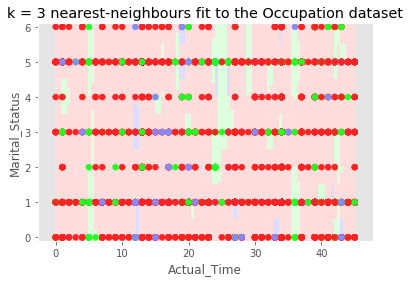

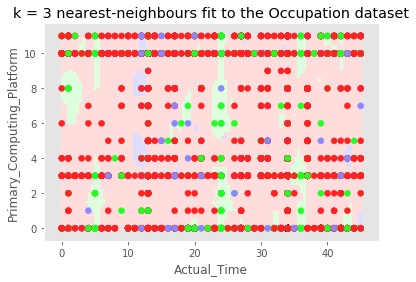

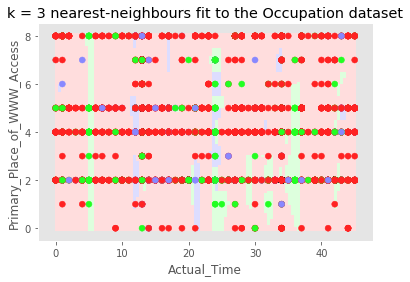

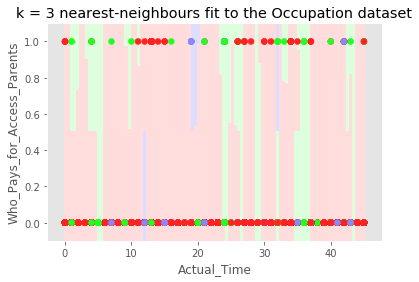

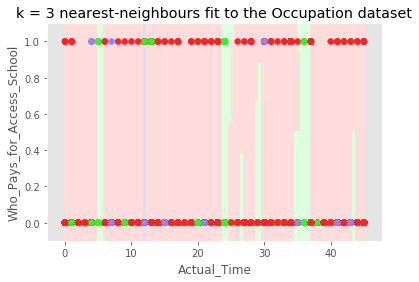

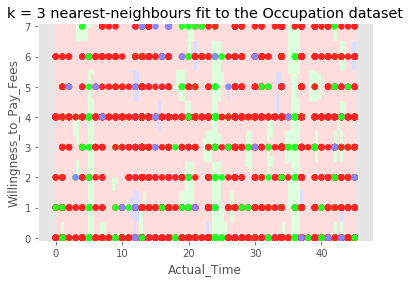

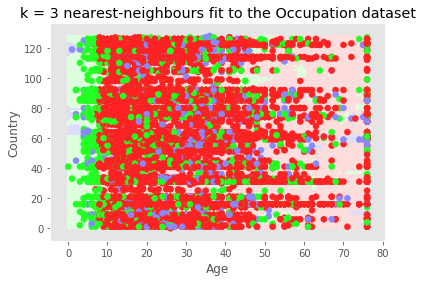

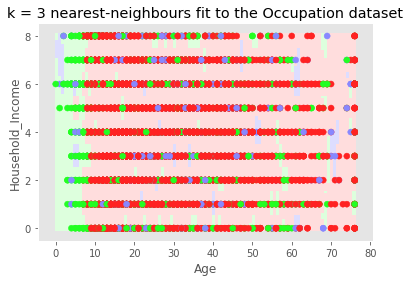

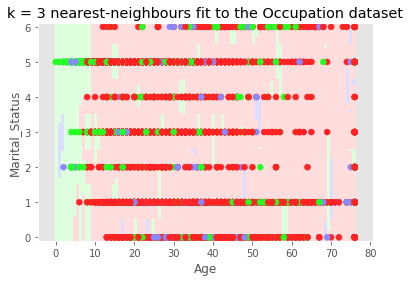

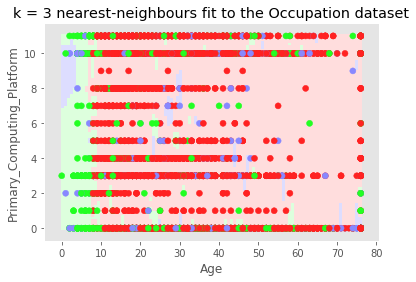

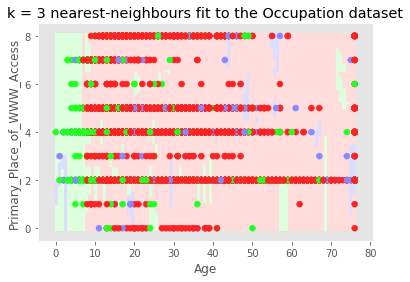

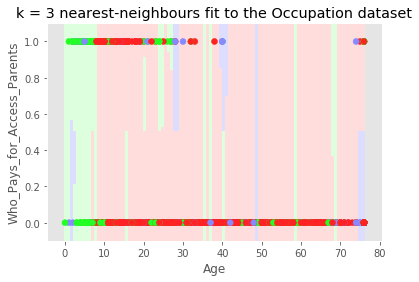

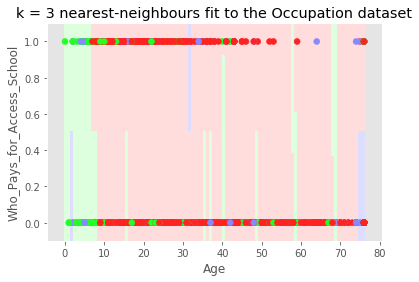

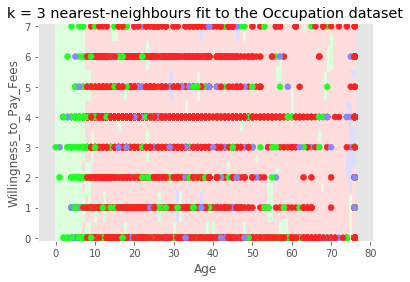

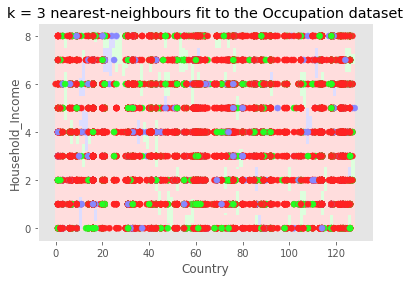

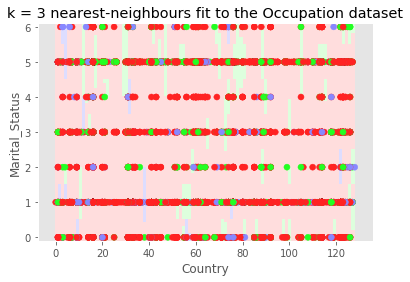

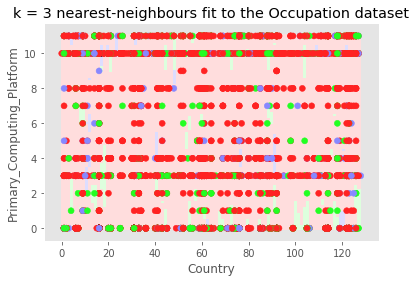

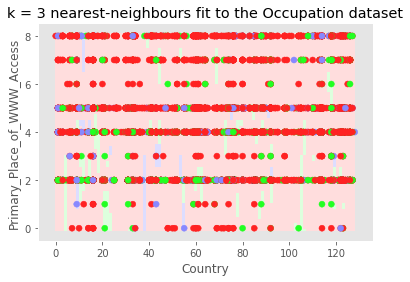

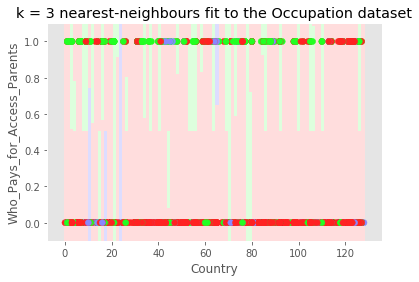

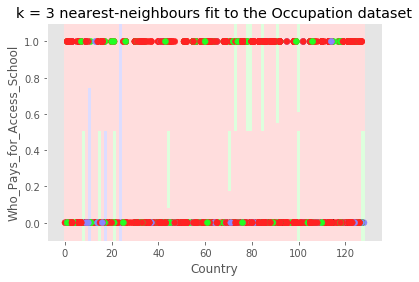

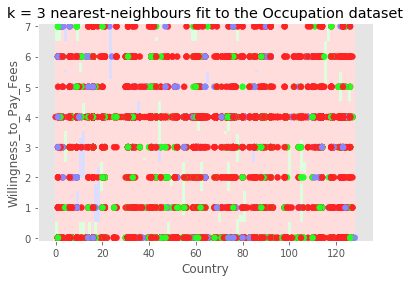

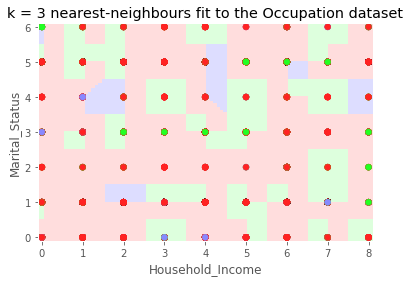

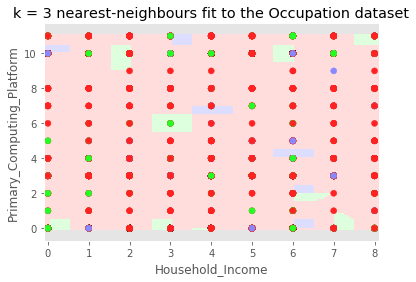

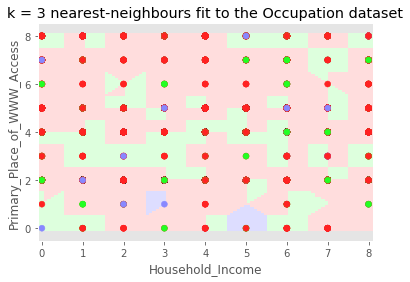

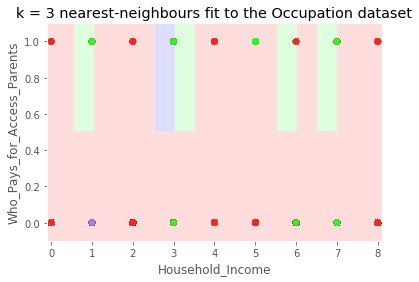

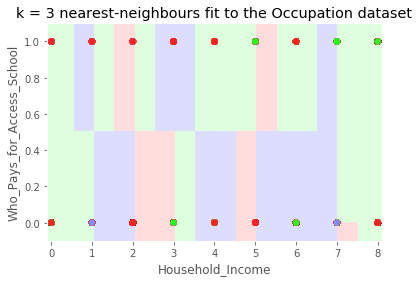

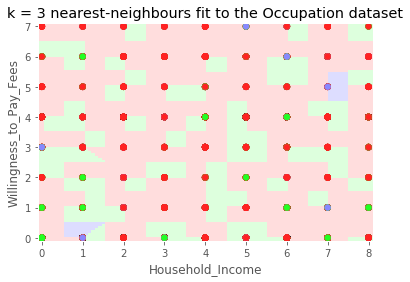

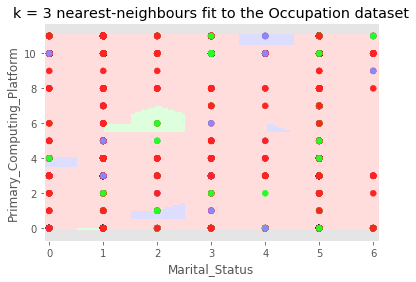

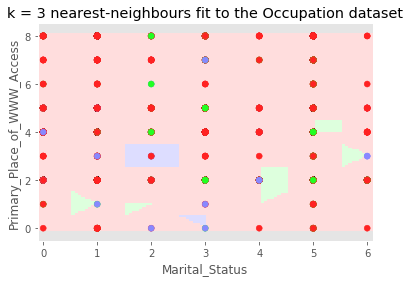

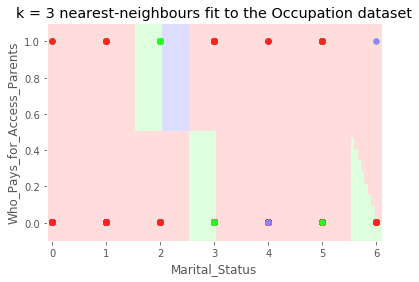

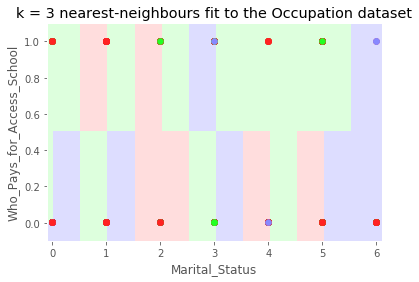

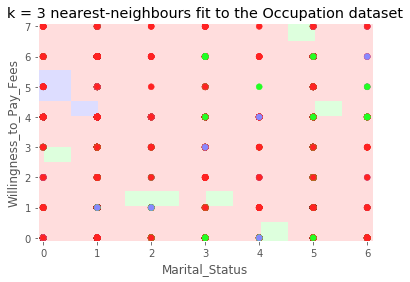

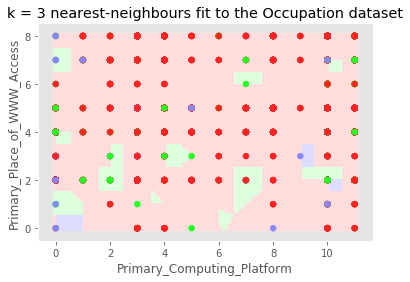

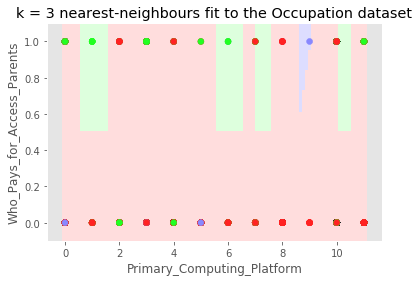

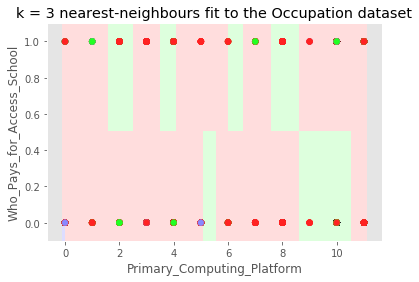

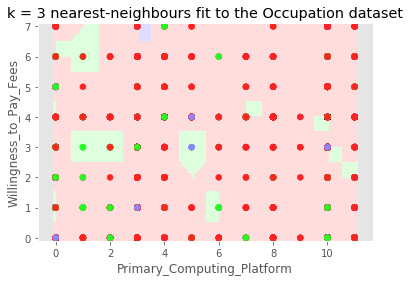

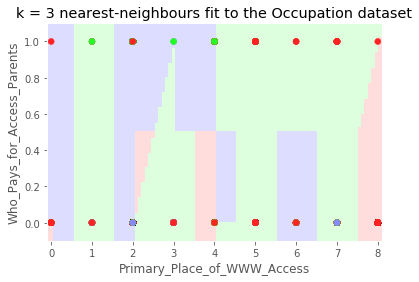

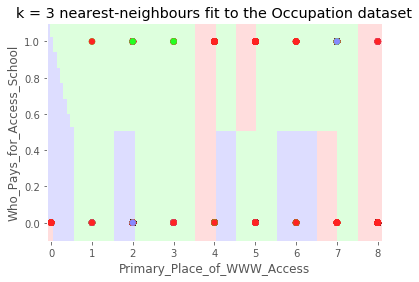

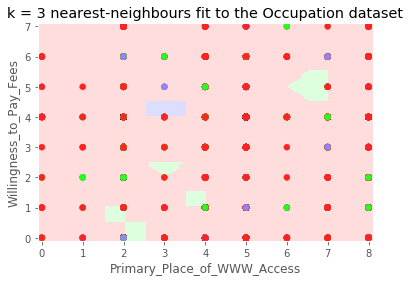

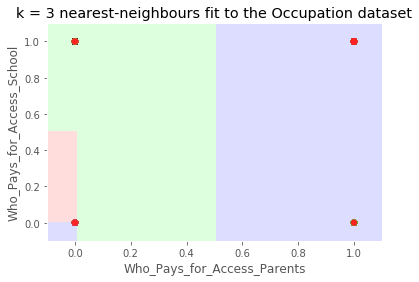

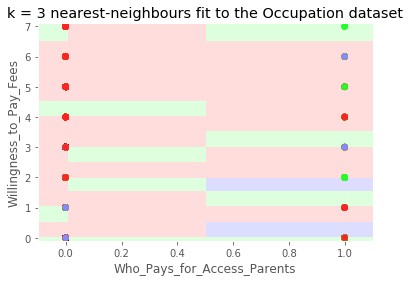

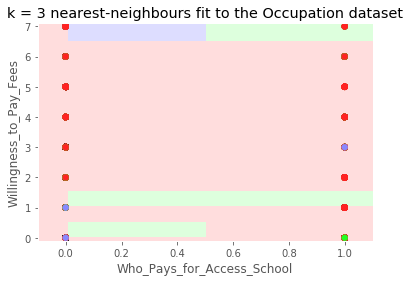

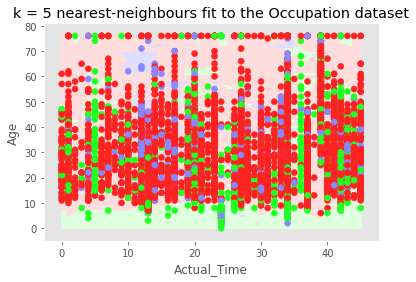

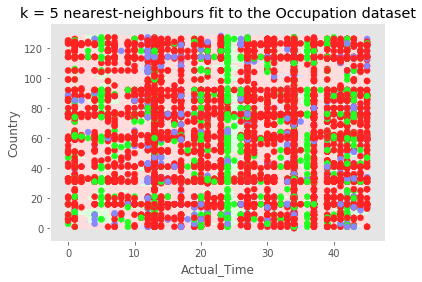

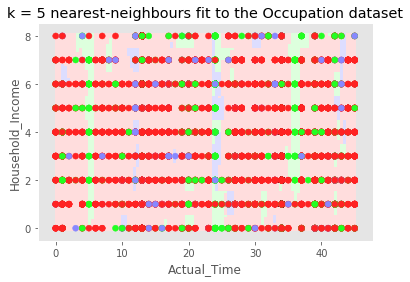

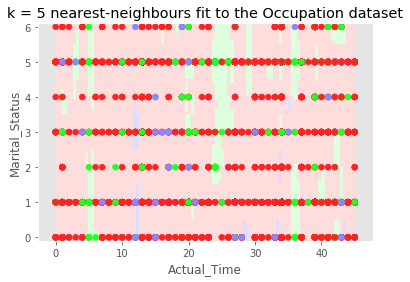

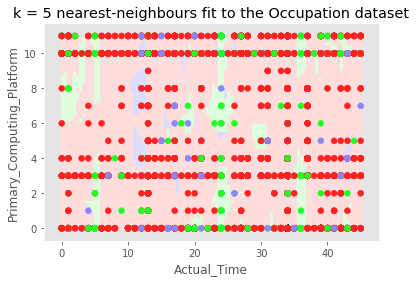

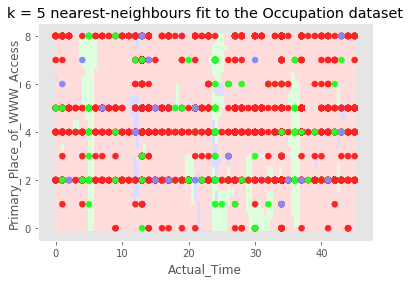

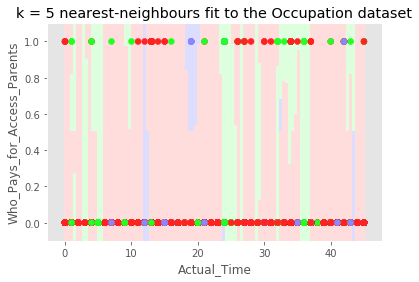

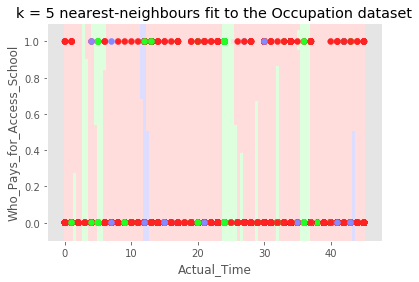

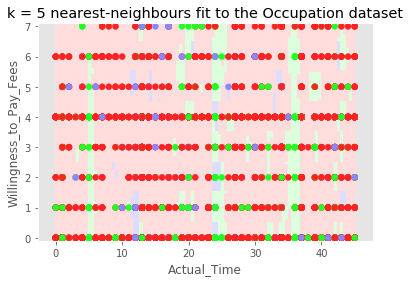

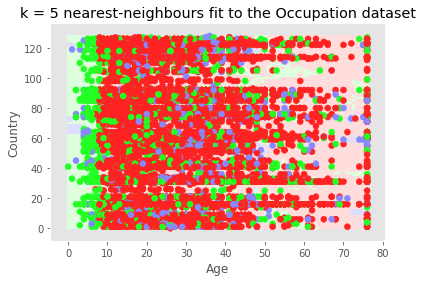

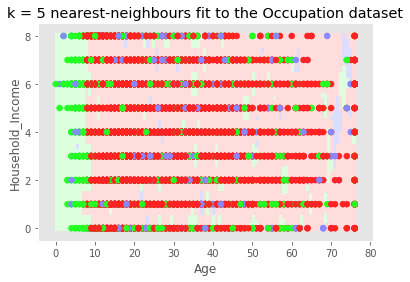

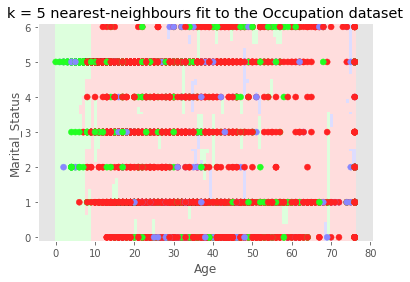

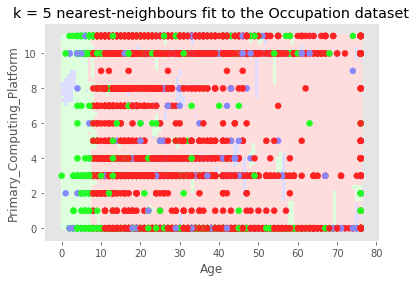

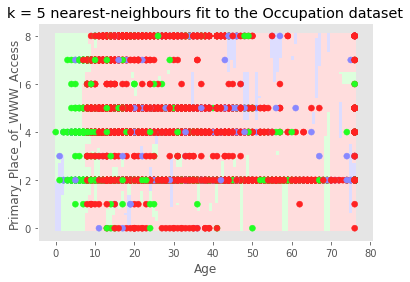

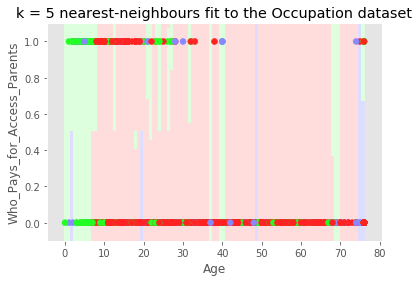

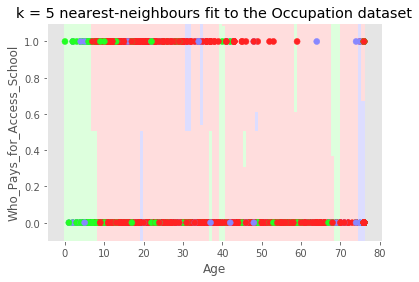

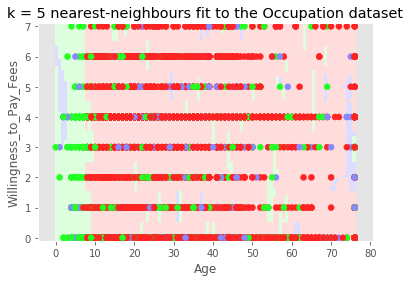

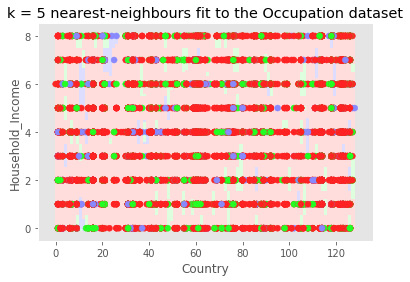

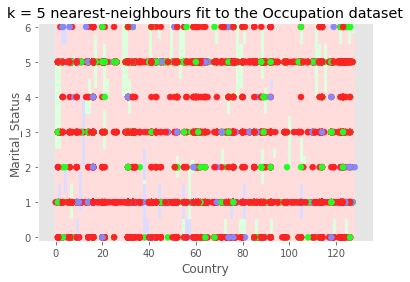

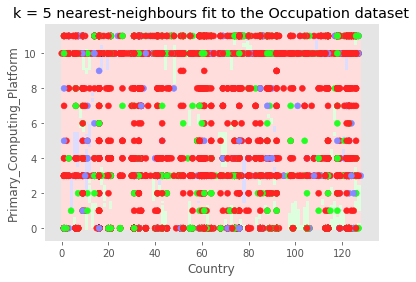

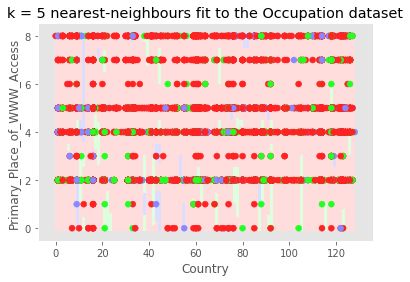

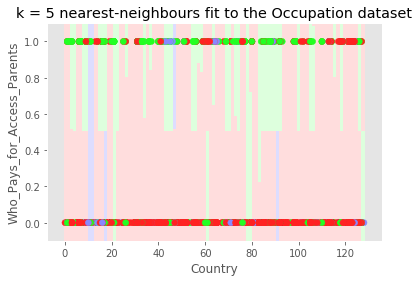

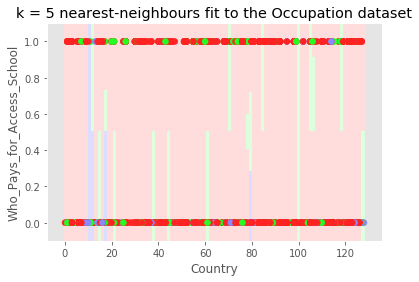

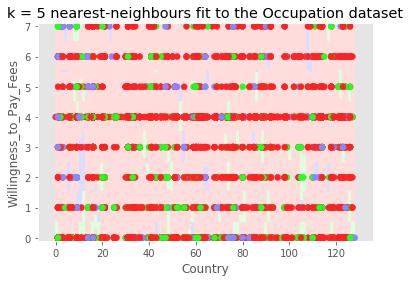

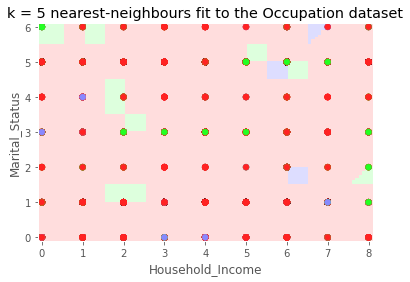

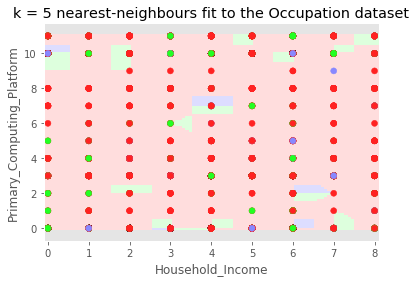

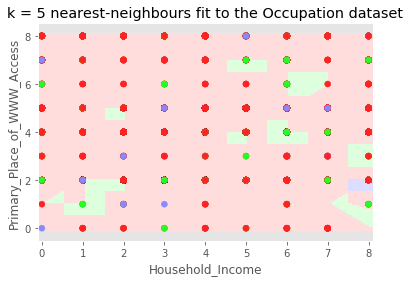

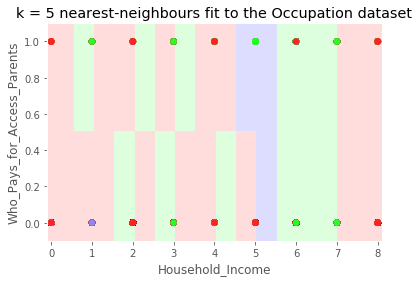

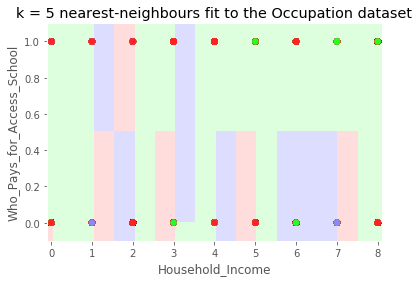

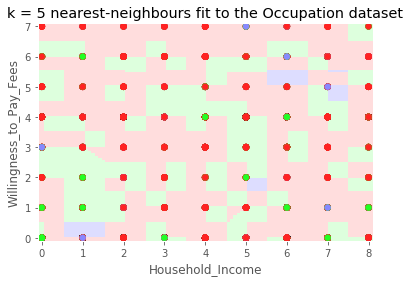

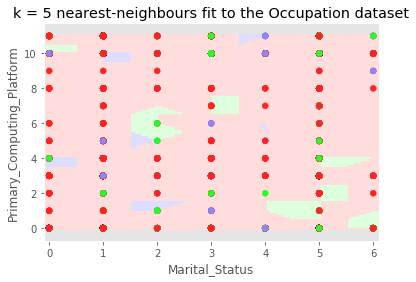

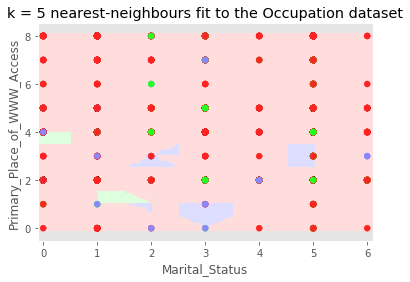

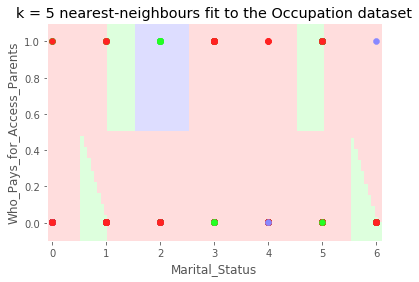

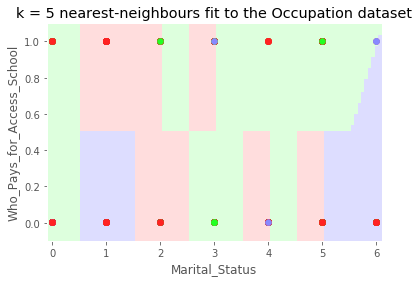

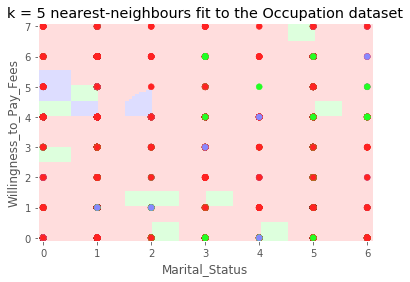

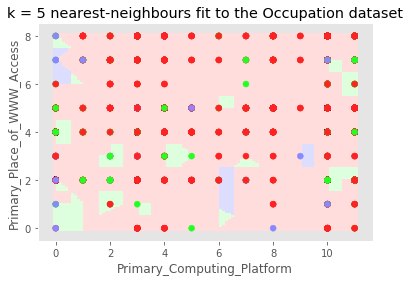

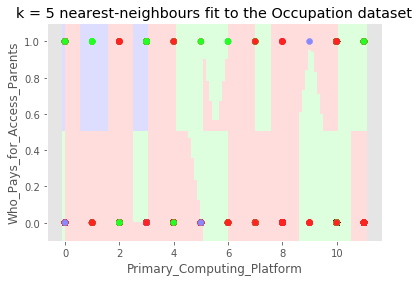

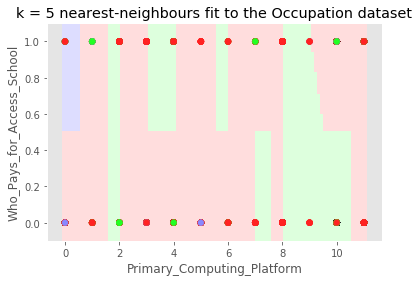

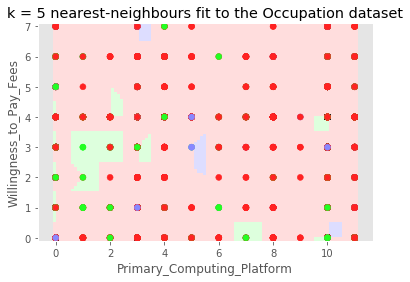

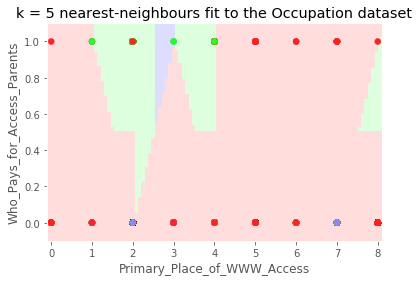

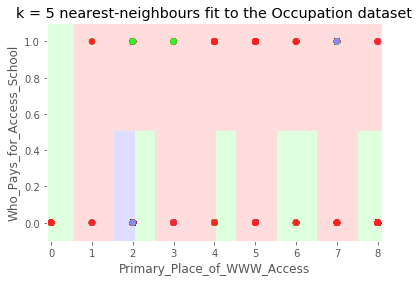

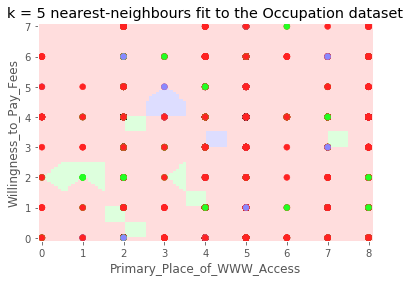

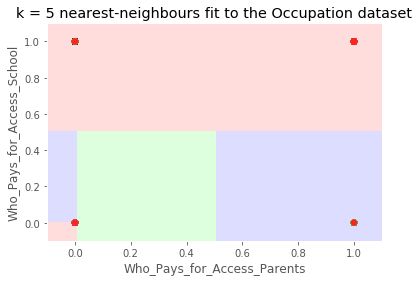

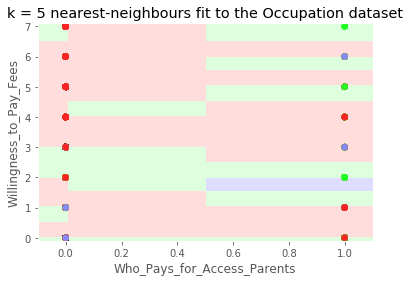

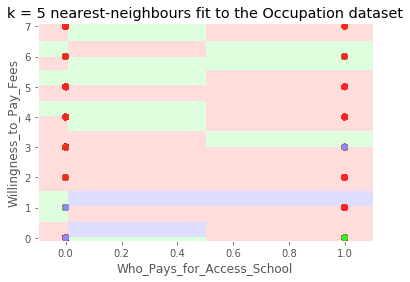

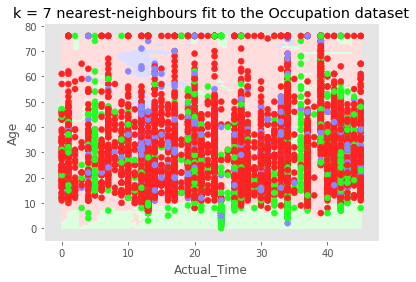

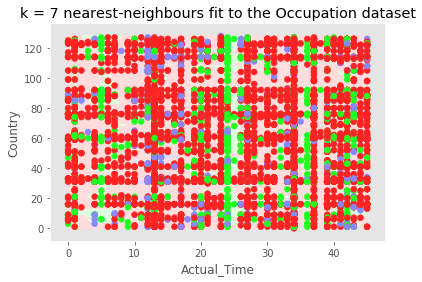

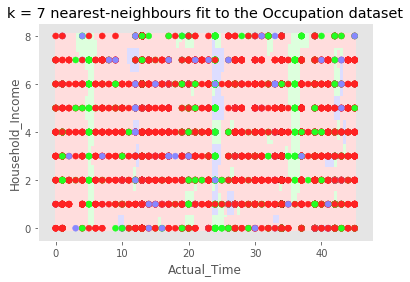

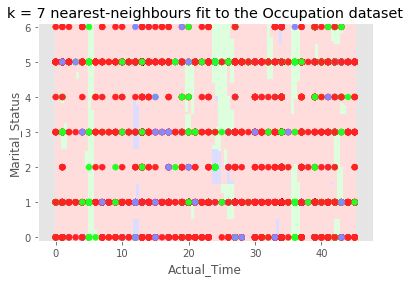

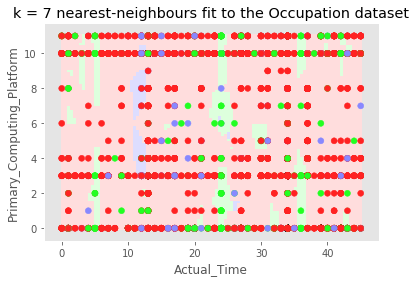

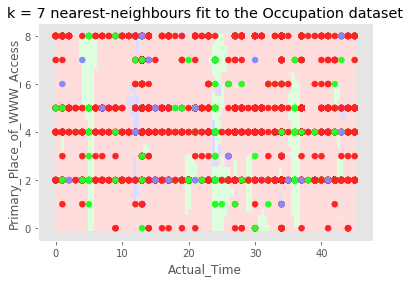

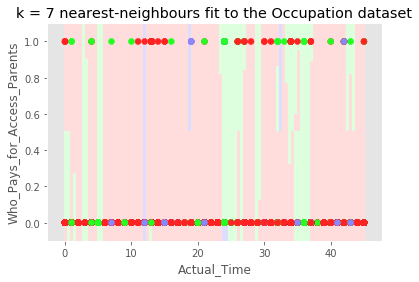

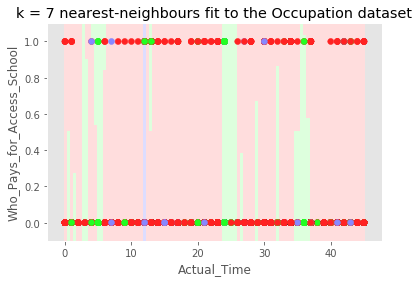

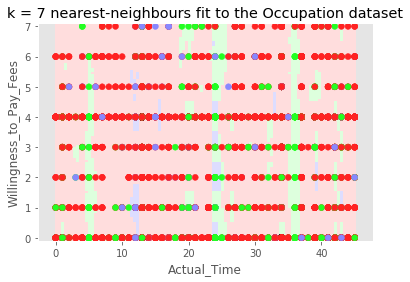

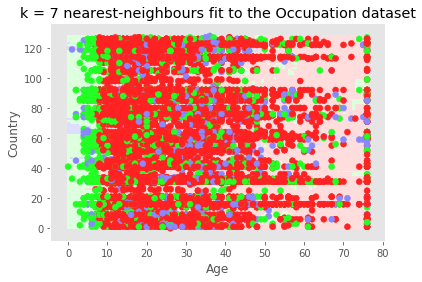

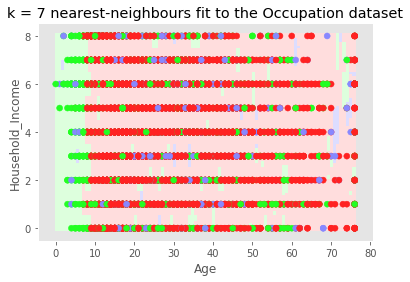

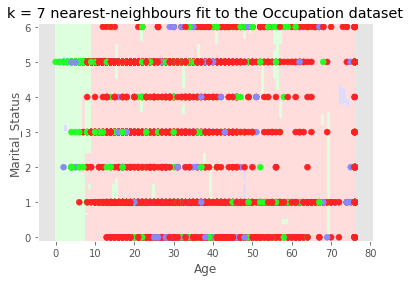

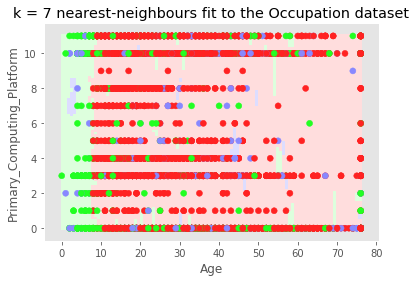

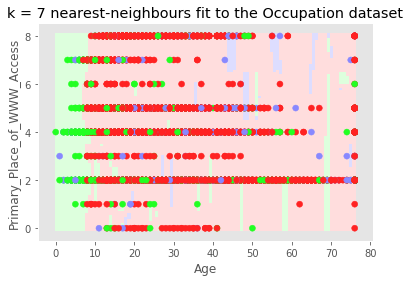

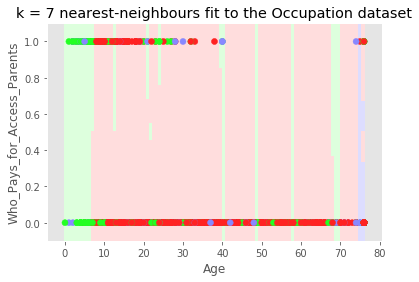

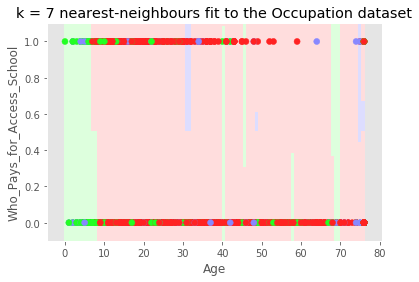

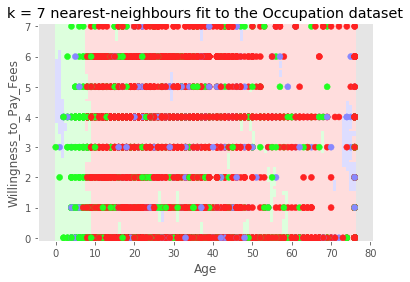

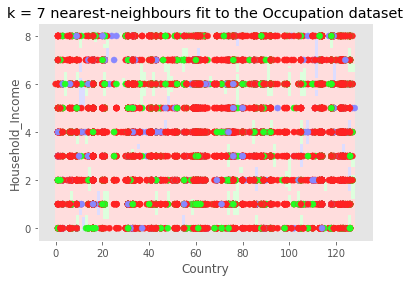

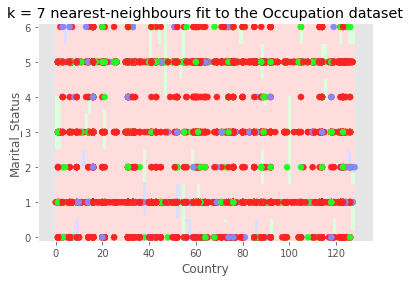

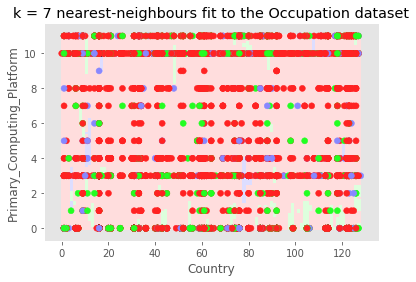

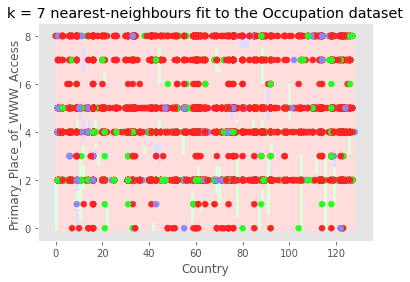

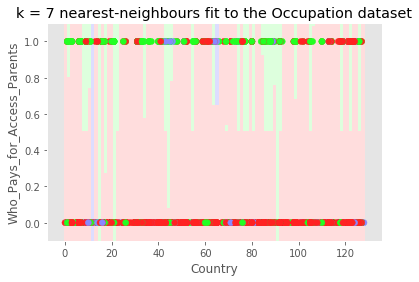

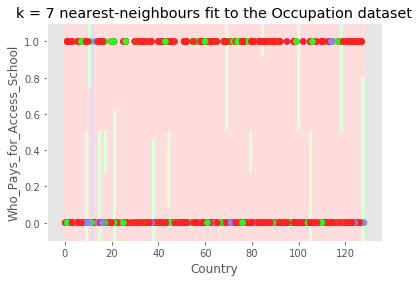

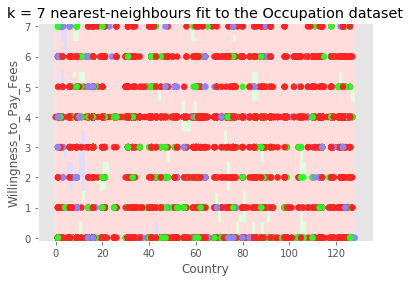

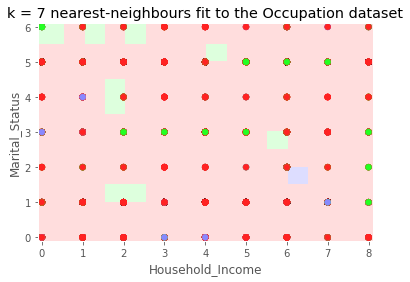

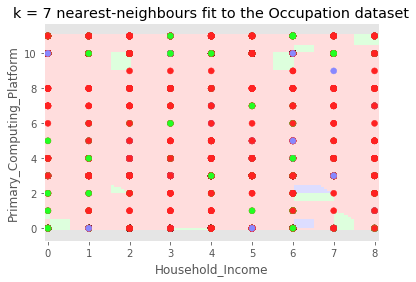

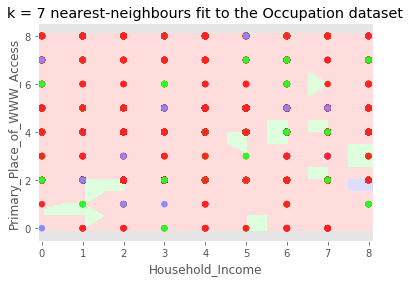

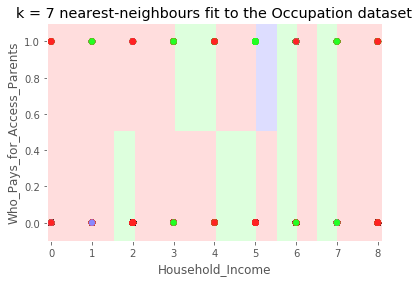

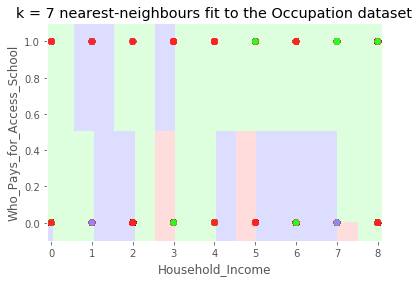

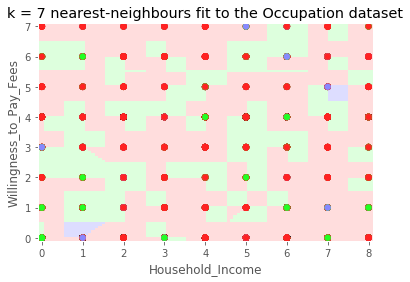

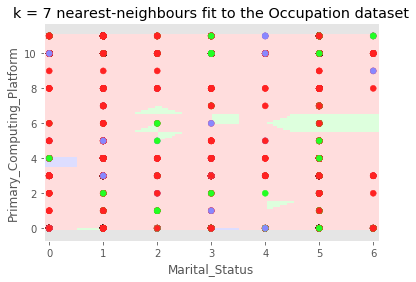

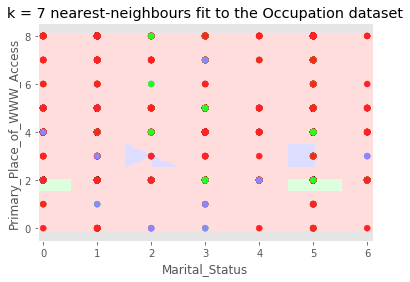

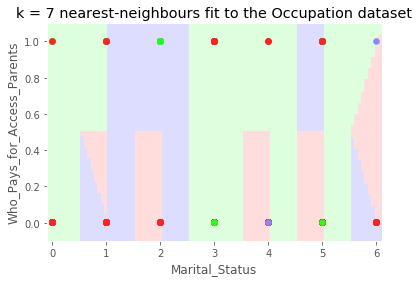

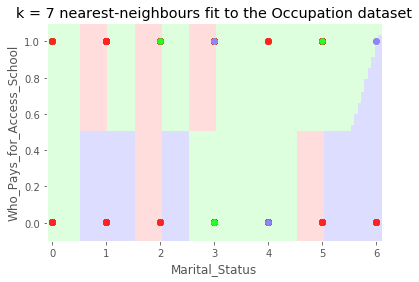

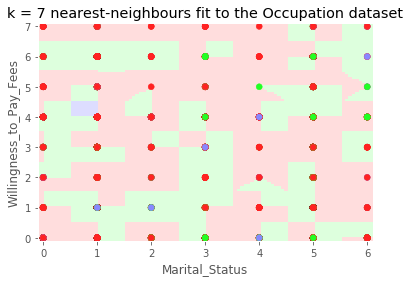

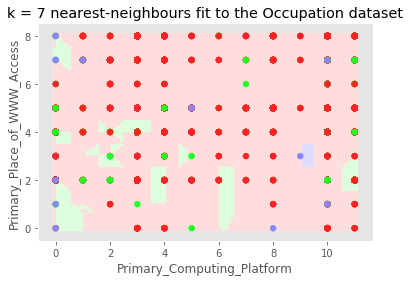

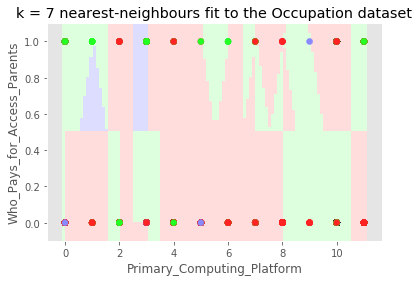

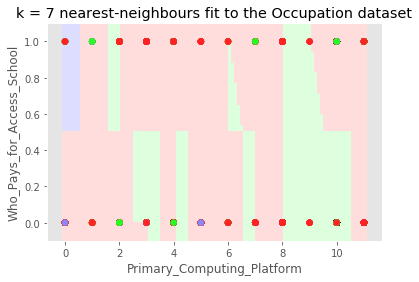

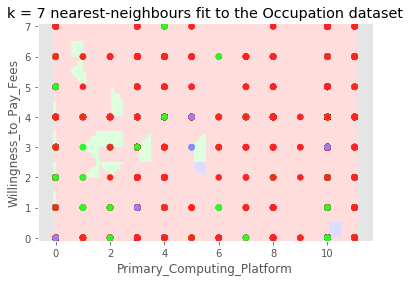

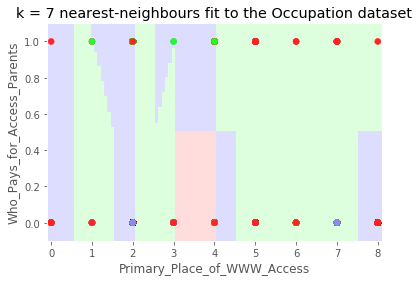

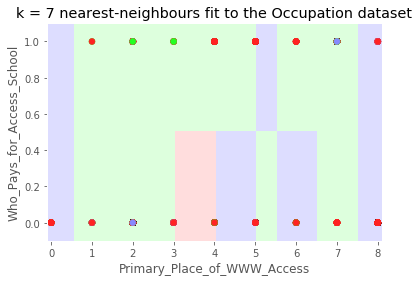

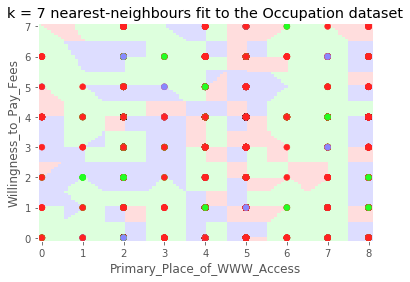

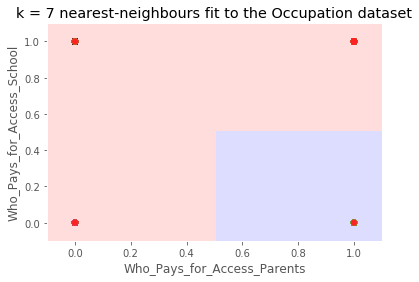

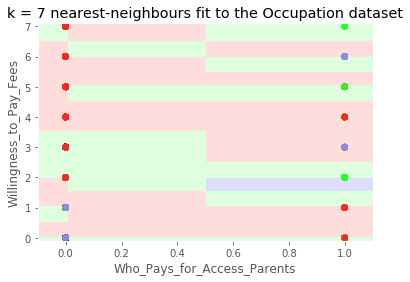

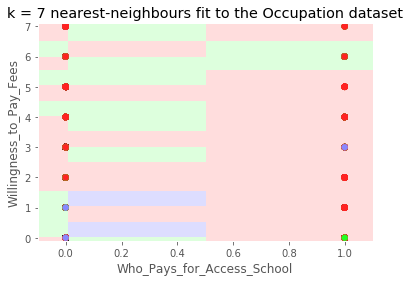

In [6]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

predNames = list(featureDF.columns)

df=pd.DataFrame(featureDF, columns=predNames)
nTrain = df.shape[0]
y = originalDF['Education_Attainment']

pattern = re.compile('[\W_]+', re.UNICODE) # https://stackoverflow.com/a/1277047
for neighborCnt in range(3,8,2): # from 3 to a maximum of 8, in steps of 2, so 3,5,7
  knn = neighbors.KNeighborsClassifier(n_neighbors=neighborCnt)
  for twoCols in itertools.combinations(predNames, 2): # https://stackoverflow.com/a/374645
    X = df[list(twoCols)]  # we only take two features at a time
    colNames = X.columns
    c1 = colNames[:1][0] # first of 2
    c2 = colNames[-1:][0] # last of 2
    c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
    c2 = pattern.sub("",c2.title())
    knn.fit(X, y)
    plotTitle = "k = %i %s fit to the %s dataset" % (neighborCnt, "nearest-neighbours", "Occupation")
    fileTitle = "k-nearest/education/k_%i_%s_%s_%s_%s.pdf" % (neighborCnt, "nearest-neighbours", "Occupation", c1, c2)
    print("Plotting file %s" % (fileTitle))
    plot_2d_class(X, y, nTrain, knn, plotTitle, fileTitle, cmap_light, cmap_bold)



## Model Validation

Next we validate the k-nearest-neighbours classification "model". Clearly, the parameter $k$ is critical to its performance. Generally, smaller values of $k$ fit the training set more accurately (less bias) but generalise less well to test data (more variance). The opposite applies to larger values of $k$.

With $k$ set to its minimum value ($k = 1$), it fits the training almost exactly (99%) and the confusion matrix is optimal. This is because the object is simply assigned to the class of that single nearest neighbor.:

In [7]:
from sklearn.neighbors import KNeighborsClassifier
X, y = featureDF, originalDF['Education_Attainment']
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X, y)
y_pred1 = knn1.predict(X)
print("Accuracy:",metrics.accuracy_score(y, y_pred1))

Accuracy: 0.998812821527503


The *confusion matrix* highlights where classification differences arise, as these occur on the off-diagonal elements of the matrix:

In [8]:
print(accuracy_score(y, y_pred1))
print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred1, digits=3))

0.998812821527503
[[1402    1    1    0    0    0    0    0    0]
 [   0 3285    5    1    0    0    0    0    0]
 [   1    1 2815    0    0    0    0    0    0]
 [   0    1    0 1244    0    0    1    0    0]
 [   0    0    0    0  271    0    0    0    0]
 [   0    0    0    0    0  201    0    0    0]
 [   0    0    0    0    0    0  460    0    0]
 [   0    0    0    0    0    0    0  255    0]
 [   0    0    0    0    0    0    0    0  163]]
              precision    recall  f1-score   support

           1      0.999     0.999     0.999      1404
           2      0.999     0.998     0.999      3291
           3      0.998     0.999     0.999      2817
           4      0.999     0.998     0.999      1246
           5      1.000     1.000     1.000       271
           6      1.000     1.000     1.000       201
           7      0.998     1.000     0.999       460
           8      1.000     1.000     1.000       255
           9      1.000     1.000     1.000       163

   micr

All training samples for each class are identified near correctly at 99% accuracy, when k = 1. This is in line with the "too good to be true" result analysis for setting k so low.

Next we split the training data into a _training set_ and a _testing set_ in order to evaluate the performance of a lower amount of data. Now we can use the train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 so I have gone with 0.2.

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y)
knn1.fit(Xtrain, ytrain)
ypred1s = knn1.predict(Xtest)
print(accuracy_score(ytest, ypred1s))
print(confusion_matrix(ytest, ypred1s))
print(classification_report(ytest, ypred1s, digits=3))

0.29821958456973297
[[ 64  68 105  15   5   3   5  13   3]
 [ 58 258 183 102  12   0  28  10   7]
 [ 86 172 198  44  18   5  27  11   3]
 [ 21  81  52  54   5  13  15   3   5]
 [ 10  14  19   2   4   1   2   2   0]
 [  1   4   4  13   0  11   0   0   7]
 [  7  36  26  15   1   0   4   0   3]
 [  9  10  13   4   3   0   2   8   2]
 [  2  10   9   6   2   1   0   1   2]]
              precision    recall  f1-score   support

           1      0.248     0.228     0.237       281
           2      0.395     0.392     0.394       658
           3      0.325     0.351     0.338       564
           4      0.212     0.217     0.214       249
           5      0.080     0.074     0.077        54
           6      0.324     0.275     0.297        40
           7      0.048     0.043     0.046        92
           8      0.167     0.157     0.162        51
           9      0.062     0.061     0.062        33

   micro avg      0.298     0.298     0.298      2022
   macro avg      0.207     0.20

As you can see, we’re fitting the model on the training data and trying to predict the test data. The accuracy score has reduced significantly since splitting the data. Let’s see what (some of) the predictions are. Note: because I used [0:5] after predictions, it only showed the first five predicted values. Removing the [0:5] would have made it print all of the predicted values that our model created.

The results show that our KNN algorithm was able to classify 2022 records in the test set with 29% accuracy, which is not optimal. The alrogithm has not performed very well with this dataset on the initial split

In [10]:
for result in ypred1s[0:5]:
    for key, val in education_values['Education_Attainment'].items():
        if val == result:
            print(key)

Masters
Some_College
High_School
Some_College
College


Next I iterated over the range of 1 to 30 for my k value in order to view the prediction accuracy scores for the model at different k ranges.

In [11]:
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(Xtrain, ytrain)
    pred_i = model.predict(Xtest)
    w = accuracy_score(ytest, pred_i)
    print(i)
    print(w)

1
0.29821958456973297
2
0.3397626112759644
3
0.3456973293768546
4
0.3496538081107814
5
0.35113748763600394
6
0.36152324431256183
7
0.36251236399604353
8
0.3590504451038576
9
0.3664688427299703
10
0.3649851632047478
11
0.3620178041543027
12
0.36152324431256183
13
0.35855588526211674
14
0.3684470820969337
15
0.36350148367952523
16
0.3743818001978239
17
0.3669634025717112
18
0.36993076162215627
19
0.3684470820969337
20
0.3659742828882295
21
0.37289812067260136
22
0.37734915924826906
23
0.37537091988130566
24
0.37388724035608306
25
0.37388724035608306
26
0.3714144411473788
27
0.3758654797230465
28
0.37091988130563797
29
0.37734915924826906


### Ten Fold Cross Validation

Next we want to validate our model using cross validation. We specifiy that we are performing 10 folds with the cv=10 parameter and that our scoring metric should be accuracy since we are in a classification setting.

In [12]:
# creating odd list of K for KNN
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.34251969 0.31984205 0.35735439 0.32806324 0.35806133 0.35643564
 0.34985134 0.34623016 0.33829365 0.33531746]
cv_scores mean:0.34319689491298744


Using cross-validation, our mean score is about 34%. This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

Then, I plotted the error rate versus K values to again evaluate optimal k.

In [13]:
error_rate = []
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

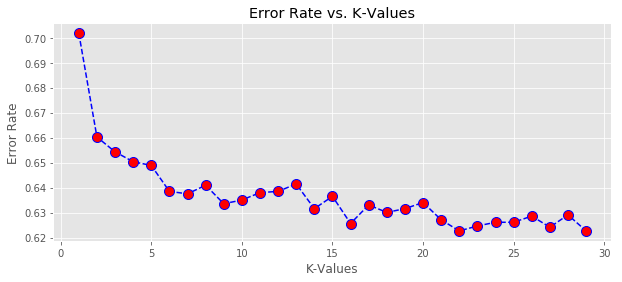

In [14]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

Using the error rate I learned that the error rate versus k-value is lowest at the k=16 mark. That is quite a high k value and is not considered optimal.

For comparison, we look at the confusion matrix when  𝑘=3 . Firstly, we try with all the training data (not holding any observations back for a test set).

In [15]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X, y)
y_pred3 = knn3.predict(X)
print(accuracy_score(y, y_pred3))
print(confusion_matrix(y, y_pred3))
print(classification_report(y, y_pred3, digits=3))

0.5990304709141274
[[1126  110  153    6    1    0    2    5    1]
 [ 410 2524  262   78    3    1   10    2    1]
 [ 507  611 1639   38    4    0   11    6    1]
 [ 145  469  109  487    0   29    5    1    1]
 [  73   88   70    2   37    0    0    1    0]
 [  10   32    6   37    2  114    0    0    0]
 [  80  204  100   18    1    0   57    0    0]
 [  93   54   44    4    1    0    0   59    0]
 [  27   58   33   22    2    9    0    0   12]]
              precision    recall  f1-score   support

           1      0.456     0.802     0.581      1404
           2      0.608     0.767     0.678      3291
           3      0.678     0.582     0.626      2817
           4      0.704     0.391     0.503      1246
           5      0.725     0.137     0.230       271
           6      0.745     0.567     0.644       201
           7      0.671     0.124     0.209       460
           8      0.797     0.231     0.359       255
           9      0.750     0.074     0.134       163

   mic

With k = 3 we get a much improved accuracy score here of 59%.

Now we try holding back 20% of the training set for use as test observations, leaving 80% of the training data to train the classifier. We then look at what happens to the confusion matrix. The accuracy score has decreased and the confusion matrix results are lower per class of Education.

In [16]:
knn3.fit(Xtrain, ytrain)
ypred3s = knn3.predict(Xtest)
print(accuracy_score(ytest, ypred3s))
print(confusion_matrix(ytest, ypred3s))
print(classification_report(ytest, ypred3s, digits=3))

0.3456973293768546
[[113  84  74   3   1   0   3   3   0]
 [122 332 154  44   1   1   4   0   0]
 [134 203 192  23   4   1   5   2   0]
 [ 32 111  44  47   0   9   5   0   1]
 [ 14  21  15   0   2   0   1   1   0]
 [  3  10   1  16   1   8   0   0   1]
 [ 13  47  26   6   0   0   0   0   0]
 [ 23  11   8   3   1   0   0   5   0]
 [  6  15   5   4   1   2   0   0   0]]
              precision    recall  f1-score   support

           1      0.246     0.402     0.305       281
           2      0.398     0.505     0.445       658
           3      0.370     0.340     0.355       564
           4      0.322     0.189     0.238       249
           5      0.182     0.037     0.062        54
           6      0.381     0.200     0.262        40
           7      0.000     0.000     0.000        92
           8      0.455     0.098     0.161        51
           9      0.000     0.000     0.000        33

   micro avg      0.346     0.346     0.346      2022
   macro avg      0.261     0.197

## PCA Transformation

Now we reduce our feature set using PCA and compare the results.

In [17]:
XPCA, yPCA = featureDF, originalDF['Education_Attainment']
scaler = preprocessing.MinMaxScaler()
XPCA = scaler.fit_transform(XPCA)

# Now we should split our data into a training set and a test set in order to properly assess our model using PCA
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(XPCA, yPCA, random_state=1)

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
pca_model = PCA(n_components=2)
model = pca_model.fit(X_train_pca)
X_train_pca = model.transform(X_train_pca)
X_test_pca = model.transform(X_test_pca)

# 2-Dimensions
X_train_pca[:5]

array([[-0.71243338,  0.14613362],
       [-0.74119715,  0.06525705],
       [-0.19609215, -0.24133664],
       [ 0.08950378, -0.50860229],
       [-0.48460758,  0.22012104]])

In [19]:
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(X_train_pca, y_train_pca)
    pred_i = model.predict(X_test_pca)
    w = accuracy_score(y_test_pca, pred_i)
    print(i)
    print(w)

1
0.2710724178868223
2
0.30510486743173726
3
0.29798179659675506
4
0.32172536604669566
5
0.3233082706766917
6
0.3379501385041551
7
0.3450732093391373
8
0.3454689354966363
9
0.3510091017016225
10
0.3529877324891175
11
0.3482390185991294
12
0.35536208943411157
13
0.3581321725366047
14
0.3565492679066086
15
0.3656509695290859
16
0.3648595172140878
17
0.3656509695290859
18
0.369212504946577
19
0.37593984962406013
20
0.37831420656905423
21
0.37435694499406413
22
0.3727740403640681
23
0.37435694499406413
24
0.368816778789078
25
0.368816778789078
26
0.369212504946577
27
0.370399683419074
28
0.3644637910565888
29
0.368816778789078


In [20]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_pca, y_train_pca) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [21]:
y_predict = knn_model.predict(X_test_pca)
y_predict

print(accuracy_score(y_test_pca, y_predict))
print(confusion_matrix(y_test_pca, y_predict))
print(classification_report(y_test_pca, y_predict, digits=3))

0.29798179659675506
[[119 106 107  14   0   1   0   3   0]
 [180 397 176  51   6   7  10   1   1]
 [224 263 196  29   2   3   2   2   2]
 [ 59 147  42  35   0   6   5   1   2]
 [ 22  27  19   3   0   0   0   0   0]
 [  7  17  11  12   0   1   0   0   0]
 [ 14  56  28  15   0   0   4   0   0]
 [ 24  21  17   1   0   0   0   1   0]
 [  3  11  10   3   0   1   0   0   0]]
              precision    recall  f1-score   support

           1      0.183     0.340     0.238       350
           2      0.380     0.479     0.424       829
           3      0.323     0.271     0.295       723
           4      0.215     0.118     0.152       297
           5      0.000     0.000     0.000        71
           6      0.053     0.021     0.030        48
           7      0.190     0.034     0.058       117
           8      0.125     0.016     0.028        64
           9      0.000     0.000     0.000        28

   micro avg      0.298     0.298     0.298      2527
   macro avg      0.163     0.14

Performance is significantly reduced on k = 3 in comparison with a non PCA reduced dataset as we saw earlier which scored 59%

Because we used principle component analysis to reduce the dimensions, we can use our model to plot the decision boundaries based on our training data and 
where our test data falls relative to these boundaries

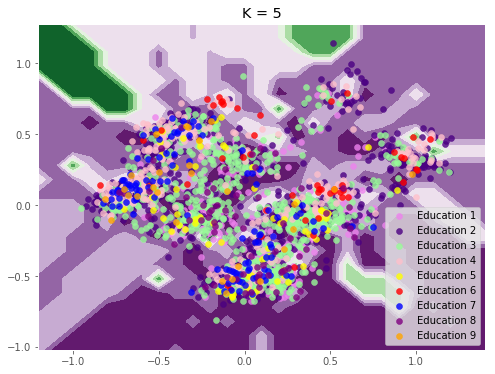

In [22]:
k = 5
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {1: 'violet', 2: 'indigo', 3: 'palegreen', 4: 'pink', 5: 'yellow', 6: 'red', 7: 'blue', 8: 'purple', 9:'orange'}
x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test_pca):
    indices = np.where(y_test_pca == label)
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1], c=colors[label], alpha=0.8, 
                label='Education {}'.format(label))

plt.legend(loc='lower right')
plt.title('K = {}'.format(k))
plt.show()

# Performance and Comparison:

In summary k-nearest neighbors has been performed on both a normal and PCA reduced data set for comparison in this analysis for Education Attainment prediction.

Performance
* k-nearest neighbours did not perform very well for this data set it is clear. 
* It did have a good performance for k=3 on the model which was not split into training and test.
* It appears that the reduction in data reduced the accuracy of the model.
* PCA did not help performance of this predictor overall either, this did not provide improvement in the model accuracy.
* There was possibly too much distance and noise in the dataset despite best efforts to convert and reduce the feature subset.
* Suspected Overfitting despite efforts against this. (low bias(accuracy scores) but high variance(confusion matrix) were encountered)

Comparison
* Compared to the other algorithms used (Decision tree and RandomForest) It has the benefit that it does not require training for making predictions, which is typically one of the most difficult parts of a machine learning algorithm.
* In comparison to using Major Occupation as a predicted label with the k-nearest-neighbors algorithm Education Attainment has not performed as well, with all tests run performing lower in terms of score percentages.

